<a href="https://colab.research.google.com/github/k-rajmani2k/projects/blob/master/Dbscan_clustering_and_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Importing DBSCAN model for clustering the labels show which point belong to same cluster and which to diff

from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

X = np.array([ [1, 2], [2, 2], [7, 6], [8, 7], [2, 3], [25, 8] ])
dbscan = DBSCAN(eps = 3, min_samples = 2)

model = dbscan.fit(X)
print(X)

print(model.labels_)




[[ 1  2]
 [ 2  2]
 [ 7  6]
 [ 8  7]
 [ 2  3]
 [25  8]]
[ 0  0  1  1  0 -1]


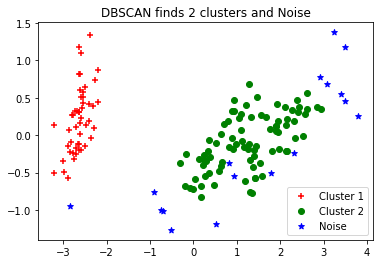

In [16]:
# Importing Modules
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

#working on iris.data
# Load Dataset
iris = load_iris()

# Declaring Model
dbscan = DBSCAN()

# Fitting
dbscan.fit(iris.data)

# Transoring Using PCA
pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)

# Plot based on Class
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and Noise')
plt.show()

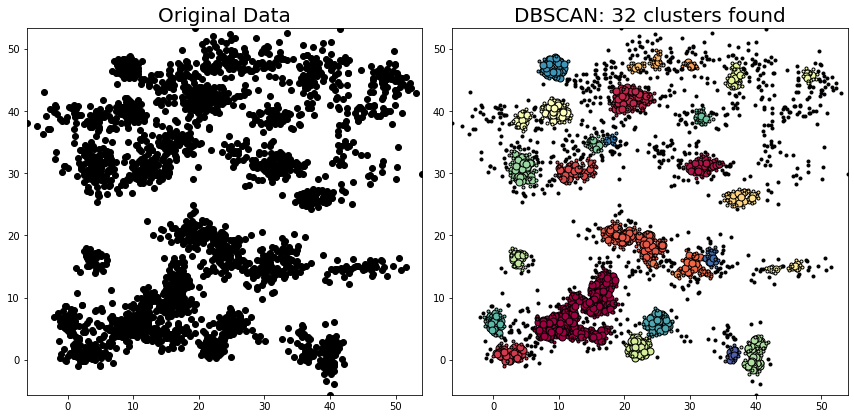

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import DBSCAN


# Define a function to generate clusters
def cluster_gen(n_clusters, pts_minmax=(10, 100), x_mult=(1, 4), y_mult=(1, 3), 
                x_off=(0, 50), y_off=(0, 50)):
    
    # n_clusters = number of clusters to generate
    # pts_minmax = range of number of points per cluster 
    # x_mult = range of multiplier to modify the size of cluster in the x-direction
    # y_mult = range of multiplier to modify the size of cluster in the x-direction
    # x_off = range of cluster position offset in the x-direction
    # y_off = range of cluster position offset in the y-direction
    
    # Initialize some empty lists to receive cluster member positions
    clusters_x = []
    clusters_y = []
    # Genereate random values given parameter ranges
    n_points = np.random.randint(pts_minmax[0], pts_minmax[1], n_clusters)
    x_multipliers = np.random.randint(x_mult[0], x_mult[1], n_clusters)
    y_multipliers = np.random.randint(y_mult[0], y_mult[1], n_clusters)
    x_offsets = np.random.randint(x_off[0], x_off[1], n_clusters)
    y_offsets = np.random.randint(y_off[0], y_off[1], n_clusters)
     
    # Generate random clusters given parameter values
    for idx, npts in enumerate(n_points):
        
        xpts = np.random.randn(npts) * x_multipliers[idx] + x_offsets[idx]
        ypts = np.random.randn(npts) * y_multipliers[idx] + y_offsets[idx]
        clusters_x.append(xpts)
        clusters_y.append(ypts)
    
    # Return cluster positions
    return clusters_x, clusters_y



# Generate some clusters!
n_clusters = 50
clusters_x, clusters_y = cluster_gen(n_clusters)
# Convert to a single dataset in OpenCV format
data = np.float32((np.concatenate(clusters_x), np.concatenate(clusters_y))).transpose()
# Define max_distance (eps parameter in DBSCAN())
max_distance = 1
db = DBSCAN(eps=max_distance, min_samples=10).fit(data)
# Extract a mask of core cluster members
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
# Extract labels (-1 is used for outliers)
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)

# Plot up the results!
min_x = np.min(data[:, 0])
max_x = np.max(data[:, 0])
min_y = np.min(data[:, 1])
max_y = np.max(data[:, 1])

fig = plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(data[:,0], data[:,1], 'ko')
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.title('Original Data', fontsize = 20)

plt.subplot(122)
# The following is just a fancy way of plotting core, edge and outliers
# Credit to: http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=7)

    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.title('DBSCAN: %d clusters found' % n_clusters, fontsize = 20)
fig.tight_layout()
plt.subplots_adjust(left=0.03, right=0.98, top=0.9, bottom=0.05)

Automatically created module for IPython interactive environment
Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


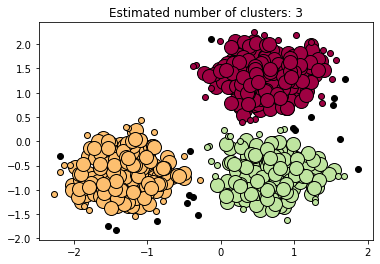

In [23]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


In [ ]:
tampered1=cv2.imread(tampered_images[0])
plot_image(tampered1)

https://www.kaggle.com/kumarrajmanibapat/plant-disease-detection-using-keras

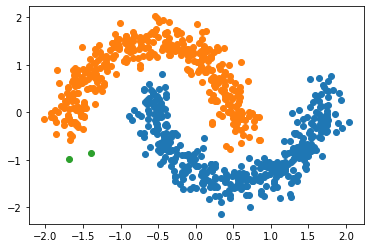

In [26]:
import numpy as np

def euclidean(x,y):
    """
    Calculate the euclidean distance between two vectors
    """
    return np.sqrt(np.sum( (x-y)**2))


def find_neighbors(db, dist_func2, p, e):
    """
    return the indecies of all points within epsilon of p
    """
    return  [idx for idx, q in enumerate(db) if dist_func2(p,q) <= e]

def dbscan(data, min_pts, eps, dist_func=euclidean):
    """
    Run the DBSCAN clustering algorithm
    """
    C = 0                          # cluster counter
    labels = {}                    # Dictionary to hold all of the clusters
    visited = np.zeros(len(data))  # check to see if we visited this point

    # going point by point through our dataset find the neighborhood and
    # determine if it is a core point. if it is, then search through all of its
    # neighbors and add them to the cluster that core point is in. Do this
    # until all points have been visited.
    for idx, point in enumerate(data):
        if visited[idx] == 1:
            continue
        visited[idx] = 1
        # all of P's neighbors
        neighbors = find_neighbors(data, dist_func, point, eps)

        # if it is not a core point then all points in its neighborhood are
        # boundary points. Thus, it is noise or an outlier.
        if len(neighbors) < min_pts:
            labels.setdefault('noise', []).append(idx)
        else:
            # else, we have a new cluster. Search through all points reachable
            # and add them to this cluster.
            C += 1
            # We want to use a list because it will extend the search
            labels.setdefault(C, []).append(idx)
            neighbors.remove(idx)  # Already been checked. Will be added below
            for q in neighbors:
                if visited[q] == 1:
                    continue
                visited[q] = 1
                q_neighbors = find_neighbors(data, dist_func, data[q, :], eps)
                if len(q_neighbors) >= min_pts:
                    neighbors.extend(q_neighbors)  # extend the search
                labels[C].append(q)

    return labels


if __name__ == "__main__":
    import matplotlib.pyplot as plt
    from sklearn.datasets import make_moons
    from sklearn.preprocessing import StandardScaler

    # make sample dataset
    X, y = make_moons(n_samples=750, shuffle=True, noise=0.11, random_state=42)
    X = StandardScaler().fit_transform(X)
    # run algorithm
    data_labels = dbscan(X, 4, 0.3, dist_func=euclidean)
    # plot resutls
    for key,values in data_labels.items():
        plt.plot(X[values][:, 0], X[values][:, 1], 'o', markersize=6, label=key)
    plt.show()

In [29]:
print("may be should reference this https://github.com/tomijerenko/clusteringAlgorithms")

may be should reference this https://github.com/tomijerenko/clusteringAlgorithms
